In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="D4fVLe4FjFMjjN3ytNW6")
project = rf.workspace("project-vnuod").project("dog-qhc8b")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 652 kB/s 
     |████████████████████████████████| 145 kB 8.8 MB/s 
     |████████████████████████████████| 67 kB 5.8 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 178 kB 45.4 MB/s 
     |████████████████████████████████| 138 kB 35.9 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=d52e6f57aa83b268939b76f43588bd8731dd44b049239d2698188bab1589ebf6
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: certifi
    Found existing installation: certif

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to dog-1 in yolov5pytorch:: 100%|██████████| 66/66 [00:00<00:00, 1497.35it/s]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from IPython.display import Image

In [4]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-49-g3c1afd9 Python-3.8.16 torch-1.13.0+cu116 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.0/107.7 GB disk)


In [9]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 7 --epochs 5 --data /content/dog-1/data.yaml --weights yolov5m.pt --cache

train: weights=yolov5m.pt, cfg=, data=/content/dog-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=7, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-49-g3c1afd9 Python-3.8.16 torch-1.13.0+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, tr

In [14]:
!python detect.py --weights /content/yolov5/runs/train/exp4/weights/best.pt --img 640 --conf 0.25 --source /content/dog-1/test/images/how-to-house-train-puppy-1655893634_jpg.rf.07aa364f50c4793ef2c564121b66cef0.jpg

detect: weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], source=/content/dog-1/test/images/how-to-house-train-puppy-1655893634_jpg.rf.07aa364f50c4793ef2c564121b66cef0.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-49-g3c1afd9 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/dog-1/test/images/how-to-house-train-puppy-1655893634_jpg.rf.07aa364f50c4793ef2c564121b66cef0.jpg: 640x640 (no detections), 1079.3ms
Speed: 4.0ms pre-process, 1079.3ms inference, 0.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/

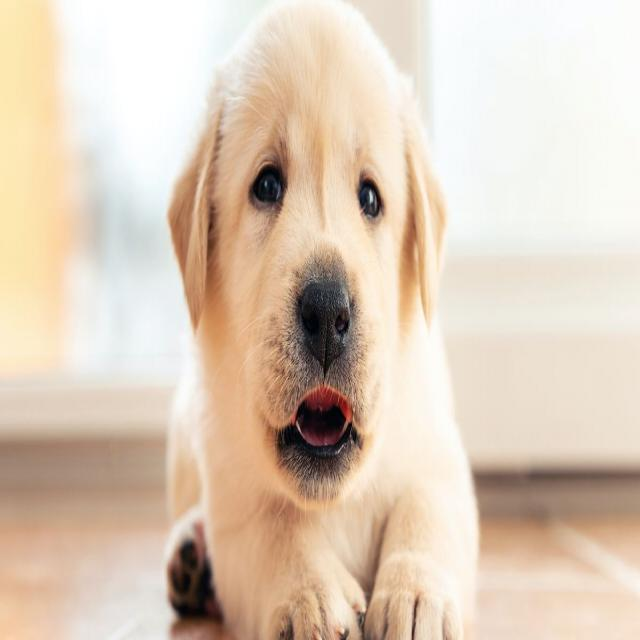

In [15]:
Image('/content/dog-1/test/images/how-to-house-train-puppy-1655893634_jpg.rf.07aa364f50c4793ef2c564121b66cef0.jpg')